# NOISY Connect-4 data generator V4
mistakes deliberately made

In [1]:
import numpy as np
import random
from tqdm.auto import tqdm
import time
import pandas as pd
from C4.c4_move_data_generator import *
import matplotlib.pyplot as plt

print("All dependencies imported successfully.")

All dependencies imported successfully.


In [2]:
PLAYS = {
    # "L1":   {"A": 1, "B": 1, "games": 1},
    # "L1":   {"A": 1, "B": 1, "games": 22},

    # "L2":   {"A": 2, "B": 2, "games": 22},
    # "L2L1": {"A": 2, "B": 1, "games": 22},
    # "L1L2": {"A": 1, "B": 2, "games": 22},

    # "L3":   {"A": 3, "B": 3, "games": 22},
    # "L3L1": {"A": 3, "B": 1, "games": 22},
    # "L3L2": {"A": 3, "B": 2, "games": 22},
    # "L1L3": {"A": 1, "B": 3, "games": 22},
    # "L2L3": {"A": 2, "B": 3, "games": 22},

    # "L4":   {"A": 4, "B": 4, "games": 10},
    # "L4L1": {"A": 4, "B": 1, "games": 10},
    # "L4L2": {"A": 4, "B": 2, "games": 10},
    # "L4L3": {"A": 4, "B": 3, "games": 10},
    # "L1L4": {"A": 1, "B": 4, "games": 10},
    # "L2L4": {"A": 2, "B": 4, "games": 10},
    # "L3L4": {"A": 3, "B": 4, "games": 10},

    "L5":   {"A": 5, "B": 5, "games": 20},
    # "L5L1": {"A": 5, "B": 1, "games": 10},
    # "L5L2": {"A": 5, "B": 2, "games": 10},
    # "L5L3": {"A": 5, "B": 3, "games": 10},
    # "L5L4": {"A": 5, "B": 4, "games": 10},
    # "L1L5": {"A": 1, "B": 5, "games": 10},
    # "L2L5": {"A": 2, "B": 5, "games": 10},
    # "L3L5": {"A": 3, "B": 5, "games": 10},
    # "L4L5": {"A": 4, "B": 5, "games": 10},

    # "L6":   {"A": 6, "B": 6, "games": 20},
    
    # "L6L1": {"A": 6, "B": 1, "games": 10},
    # "L6L2": {"A": 6, "B": 2, "games": 10},
    # "L6L3": {"A": 6, "B": 3, "games": 10},
    # "L6L4": {"A": 6, "B": 4, "games": 10},
    # "L6L5": {"A": 6, "B": 5, "games": 10},
    
    # "L1L6": {"A": 1, "B": 6, "games": 10},
    # "L2L6": {"A": 2, "B": 6, "games": 10},
    # "L3L6": {"A": 3, "B": 6, "games": 10},
    # "L4L6": {"A": 4, "B": 6, "games": 10},
    # "L5L6": {"A": 5, "B": 6, "games": 10},

    # "L7":   {"A": 7, "B": 7, "games": 10},
    
    # "L7L1": {"A": 7, "B": 1, "games": 10},   
    # "L7L2": {"A": 7, "B": 2, "games": 10}, 
    
    # "L7L3": {"A": 7, "B": 3, "games": 10}, 
    # "L7L4": {"A": 7, "B": 4, "games": 10}, 
    
    #  "L7L5": {"A": 7, "B": 5, "games": 10}, 
    # "L7L6": {"A": 7, "B": 6, "games": 10}, 
    
    # "L1L7": {"A": 1, "B": 7, "games": 10},  
    # "L2L7": {"A": 2, "B": 7, "games": 10}, 
    
    # "L3L7": {"A": 3, "B": 7, "games": 10}, 
    # "L4L7": {"A": 4, "B": 7, "games": 10}, 
    
    # "L5L7": {"A": 5, "B": 7, "games": 10}, 
    # "L6L7": {"A": 6, "B": 7, "games": 10}, 

}
assert PLAYS and sum(len(v) for v in PLAYS.values()) > 0, "PLAYS is empty – skip logging."

In [3]:
DATA_FILE = "DATA/C4.bad_play_data.xlsx"

In [4]:
# CFG = {
#     "noiseA": 0.15,
#     "noiseB": 0.0,
#     "forceLoss": 0.075,
# }

CFG = {
    "noiseA": 0.33,
    "noiseB": 0.0,
    "forceLoss": 0.15,
}

In [5]:
from tqdm.auto import tqdm
import pandas as pd

records = []
for label, cfg in tqdm(PLAYS.items()):
    records.extend(generate_dataset({label: cfg}, seed=666, CFG=CFG))

df_new   = records_to_dataframe(records)   # columns: label, reward, game, ply, 0-0..5-6
df_saved = upsert_excel(df_new, DATA_FILE)
print("Saved", len(df_saved), "unique rows")

  0%|          | 0/1 [00:00<?, ?it/s]

Saved 26020 unique rows


In [6]:
df_new[["reward"]].describe()

,reward
count,543.000000
mean,49.810535
std,29.885220
min,-51.000000
25%,29.000000
50%,54.500000
75%,79.000000
max,100.000000


In [7]:
df_saved[["reward"]].describe()

,reward
count,26020.000000
mean,52.758888
std,29.554120
min,-81.000000
25%,29.500000
50%,59.500000
75%,79.000000
max,100.000000


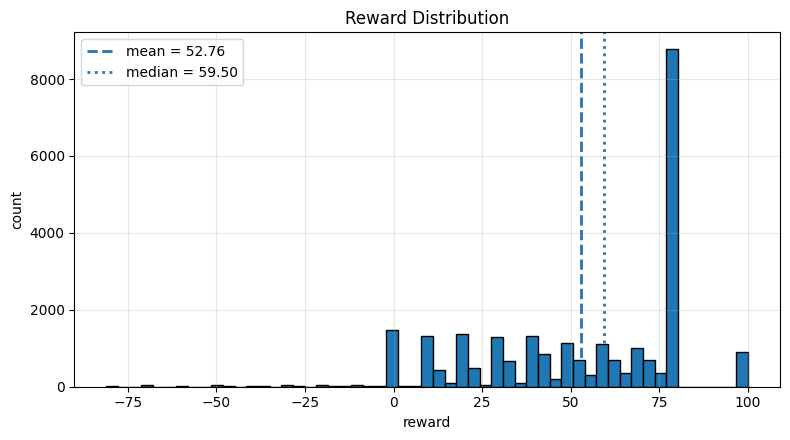

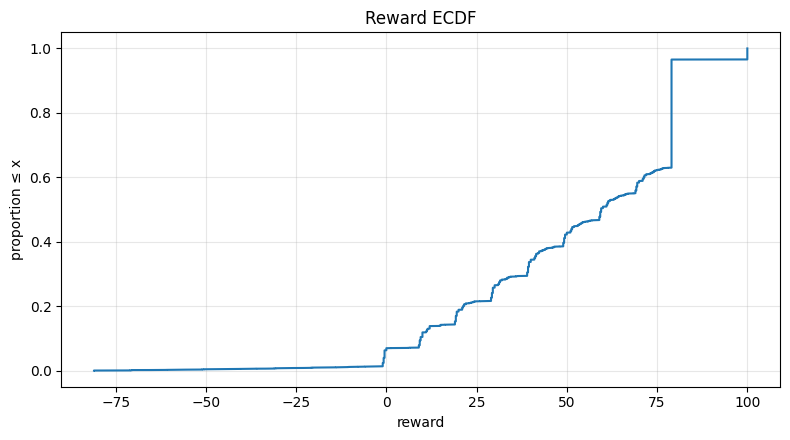

In [8]:
r = df_saved["reward"].astype(float).dropna()

# --- Histogram ---
fig, ax = plt.subplots(figsize=(8,4.5))
bins = np.arange(r.min()-0.5, r.max()+1.5, 1) if np.allclose(r, r.round()) else "auto"
n, bins, _ = ax.hist(r, bins=bins, edgecolor="black")
ax.axvline(r.mean(),   ls="--", lw=2, label=f"mean = {r.mean():.2f}")
ax.axvline(r.median(), ls=":",  lw=2, label=f"median = {r.median():.2f}")
ax.set(title="Reward Distribution", xlabel="reward", ylabel="count")
ax.grid(True, alpha=0.3)
ax.legend()
fig.tight_layout()

r_sorted = np.sort(r.values)
y = np.arange(1, len(r_sorted)+1) / len(r_sorted)
plt.figure(figsize=(8,4.5))
plt.plot(r_sorted, y)
plt.title("Reward ECDF")
plt.xlabel("reward")
plt.ylabel("proportion ≤ x")
plt.grid(True, alpha=0.3)
plt.tight_layout()
